# Exploring and Visualizing Housing Prices Trends in Sweden


This Python script uses Pandas, Seaborn, and Matplotlib to analyze and visualize the temporal and monthly variations in housing prices across different regions and property types in Sweden. The processed data is saved for future reference, providing a concise overview of the market trends.

Datasource: 

https://www.ekonomifakta.se/Fakta/makroekonomi/bostader/Bostadspriser/?graph=/26900/1,3,4,5,6,7,8,2/all/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from locale import setlocale, LC_TIME
from scipy.stats import norm



C:\Users\DEKI_\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel('prisindex_bostad.xlsx', header=[0, 1])

In [3]:
df

Bostadspriser för riket och storstadsområdena                      \
                               Unnamed: 0_level_1 Bostadsrätt - Riket   
0                                          jan-05          100.000000   
1                                          feb-05          101.006920   
2                                          mar-05          103.844188   
3                                          apr-05          106.029971   
4                                          maj-05          107.979960   
..                                            ...                 ...   
220                                        maj-23          310.559750   
221                                        jun-23          304.817439   
222                                        jul-23          299.953146   
223                                        aug-23          301.944431   
224                                        sep-23          307.381430   

                                                                        \
    Bostadsrätt - Göteborg Bostadsrätt - Malmö Bostadsrätt - Stockholm   
0               100.000000          100.000000              100.000000   
1               102.350448          101.543377              100.526120   
2               105.650537          102.423704              103.797711   
3               111.686422          106.505095              105.488554   
4               117.638382          107.998984              106.494037   
..                     ...                 ...                     ...   
220             314.458029          310.098188              300.877240   
221             310.241464          305.263280              294.893637   
222             303.317077          303.312409              289.802287   
223             305.923781          298.811667              293.158951   
224             309.318985          303.898263              299.166753   

                                                            
    Hus - Riket Hus - Göteborg Hus - Malmö Hus - Stockholm  
0    100.000000     100.000000  100.000000      100.000000  
1    101.036280     103.773210   99.434545      100.450413  
2    103.267158     104.559336  103.135556      102.562814  
3    104.909698     107.691027  106.765295      103.677527  
4    106.485137     110.004640  109.350586      104.024344  
..          ...            ...         ...             ...  
220  255.411669     259.182554  244.516712      270.889998  
221  251.594774     257.420933  245.739267      262.530217  
222  246.582675     251.405838  249.276054      252.949197  
223  242.384535     247.804438  252.643034      246.348723  
224  244.344183     246.285347  250.731792      251.517038  

[225 rows x 9 columns]

In [4]:
# Rename the index column at position 0 to "Date"
df = df.rename(columns={'Unnamed: 0_level_1': 'Date'})

In [5]:
df.head()

Bostadspriser för riket och storstadsområdena                      \
                                           Date Bostadsrätt - Riket   
0                                        jan-05          100.000000   
1                                        feb-05          101.006920   
2                                        mar-05          103.844188   
3                                        apr-05          106.029971   
4                                        maj-05          107.979960   

                                                                      \
  Bostadsrätt - Göteborg Bostadsrätt - Malmö Bostadsrätt - Stockholm   
0             100.000000          100.000000              100.000000   
1             102.350448          101.543377              100.526120   
2             105.650537          102.423704              103.797711   
3             111.686422          106.505095              105.488554   
4             117.638382          107.998984              106.494037   

                                                          
  Hus - Riket Hus - Göteborg Hus - Malmö Hus - Stockholm  
0  100.000000     100.000000  100.000000      100.000000  
1  101.036280     103.773210   99.434545      100.450413  
2  103.267158     104.559336  103.135556      102.562814  
3  104.909698     107.691027  106.765295      103.677527  
4  106.485137     110.004640  109.350586      104.024344

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   (Bostadspriser för riket och storstadsområdena, Date)                     225 non-null    object 
 1   (Bostadspriser för riket och storstadsområdena, Bostadsrätt - Riket)      225 non-null    float64
 2   (Bostadspriser för riket och storstadsområdena, Bostadsrätt - Göteborg)   225 non-null    float64
 3   (Bostadspriser för riket och storstadsområdena, Bostadsrätt - Malmö)      225 non-null    float64
 4   (Bostadspriser för riket och storstadsområdena, Bostadsrätt - Stockholm)  225 non-null    float64
 5   (Bostadspriser för riket och storstadsområdena, Hus - Riket)              225 non-null    float64
 6   (Bostadspriser för riket och storstadsområdena, Hus - Göteborg)    

In [7]:
# Drop the first level from the columns: 'Bostadspriser för riket och storstadsområdena'
df.columns = df.columns.droplevel(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     225 non-null    object 
 1   Bostadsrätt - Riket      225 non-null    float64
 2   Bostadsrätt - Göteborg   225 non-null    float64
 3   Bostadsrätt - Malmö      225 non-null    float64
 4   Bostadsrätt - Stockholm  225 non-null    float64
 5   Hus - Riket              225 non-null    float64
 6   Hus - Göteborg           225 non-null    float64
 7   Hus - Malmö              225 non-null    float64
 8   Hus - Stockholm          225 non-null    float64
dtypes: float64(8), object(1)
memory usage: 15.9+ KB


In [9]:
# Set the locale to Swedish for date parsing
setlocale(LC_TIME, 'sv_SE')

# Convert 'Date' column to datetime dtype
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

# Display the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     225 non-null    datetime64[ns]
 1   Bostadsrätt - Riket      225 non-null    float64       
 2   Bostadsrätt - Göteborg   225 non-null    float64       
 3   Bostadsrätt - Malmö      225 non-null    float64       
 4   Bostadsrätt - Stockholm  225 non-null    float64       
 5   Hus - Riket              225 non-null    float64       
 6   Hus - Göteborg           225 non-null    float64       
 7   Hus - Malmö              225 non-null    float64       
 8   Hus - Stockholm          225 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 15.9 KB


In [10]:
df.head()

,Date,Bostadsrätt - Riket,Bostadsrätt - Göteborg,Bostadsrätt - Malmö,Bostadsrätt - Stockholm,Hus - Riket,Hus - Göteborg,Hus - Malmö,Hus - Stockholm
0,2005-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2005-02-01,101.006920,102.350448,101.543377,100.526120,101.036280,103.773210,99.434545,100.450413
2,2005-03-01,103.844188,105.650537,102.423704,103.797711,103.267158,104.559336,103.135556,102.562814
3,2005-04-01,106.029971,111.686422,106.505095,105.488554,104.909698,107.691027,106.765295,103.677527
4,2005-05-01,107.979960,117.638382,107.998984,106.494037,106.485137,110.004640,109.350586,104.024344


In [11]:
df.set_index('Date', inplace=True)


In [12]:
df.head()

,Bostadsrätt - Riket,Bostadsrätt - Göteborg,Bostadsrätt - Malmö,Bostadsrätt - Stockholm,Hus - Riket,Hus - Göteborg,Hus - Malmö,Hus - Stockholm
Date,,,,,,,,
2005-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2005-02-01,101.006920,102.350448,101.543377,100.526120,101.036280,103.773210,99.434545,100.450413
2005-03-01,103.844188,105.650537,102.423704,103.797711,103.267158,104.559336,103.135556,102.562814
2005-04-01,106.029971,111.686422,106.505095,105.488554,104.909698,107.691027,106.765295,103.677527
2005-05-01,107.979960,117.638382,107.998984,106.494037,106.485137,110.004640,109.350586,104.024344


In [13]:
def plot_data_with_trendline(df, include_trendline=False):
    """
    Plot line charts for each column in the DataFrame with an optional trendline.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing time-series data.
    - include_trendline (bool, optional): Whether to include a trendline in the plot. Default is False.

    Returns:
    None
    
    # Example usage:
    # plot_data_with_trendline(your_dataframe, include_trendline=True)  # Include trendline
    # plot_data_with_trendline(your_dataframe, include_trendline=False)  # Exclude trendline

    """
    # Generate an extended date range to cover the entire period
    start_date = pd.to_datetime('2000-01-01')
    end_date = pd.to_datetime('2023-09-01')
    extended_index = pd.date_range(start=start_date, end=end_date, freq='MS')

    # Make sure the DataFrame has the extended index
    df = df.reindex(extended_index)

    # Calculate the standard deviation for each column
    std_dev = df.std()

    # Fill missing values using the forward fill method
    df = df.ffill()

    # Set up the plot layout
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
    axes = axes.flatten()

    # Iterate through each column for plotting
    for i, (column, color) in enumerate(zip(df.columns, sns.color_palette("husl", len(df.columns)))):
        # Plot the original data
        sns.lineplot(x=df.index, y=df[column], ax=axes[i], color=color, label=column, linewidth=2)

        # Optionally, add a trendline
        if include_trendline:
            # Fit a linear trend line using polyfit
            trend_line_coeff = np.polyfit(range(len(df)), df[column], 1)
            trend_line = np.polyval(trend_line_coeff, range(len(df)))

            # Plot the trend line in black
            axes[i].plot(df.index, trend_line, color='black', linestyle='--', label='Trend Line', linewidth=2)

        # Set plot attributes
        axes[i].set_title(column)
        axes[i].set_xlabel('Datum')
        axes[i].set_ylabel('Sysselsättning')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend()

    # Remove empty subplots if there are more subplots than columns
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()



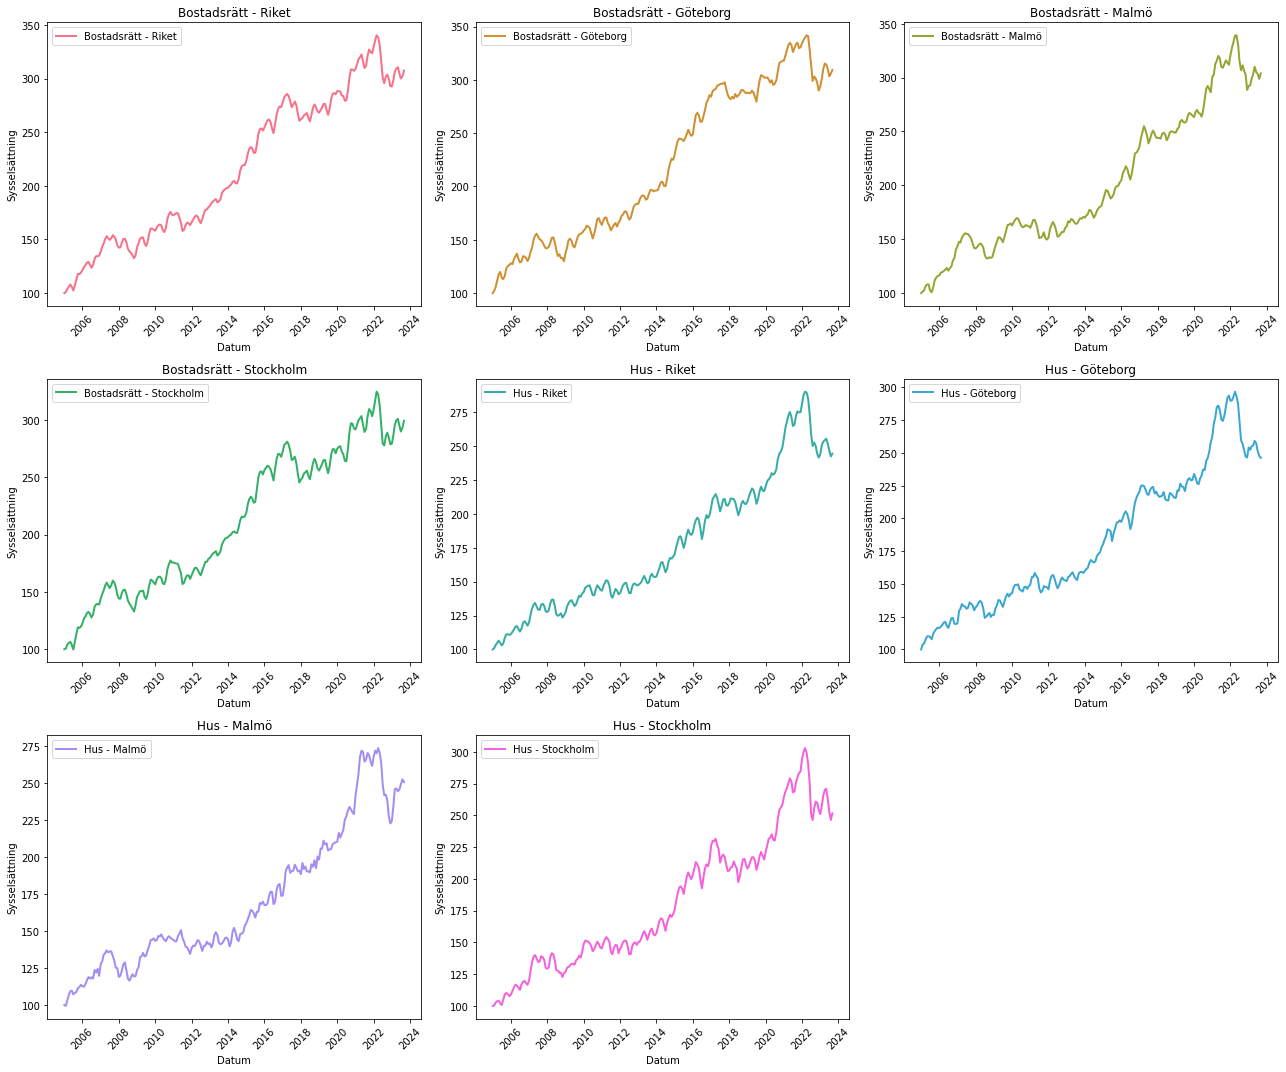

In [15]:
plot_data_with_trendline(df)

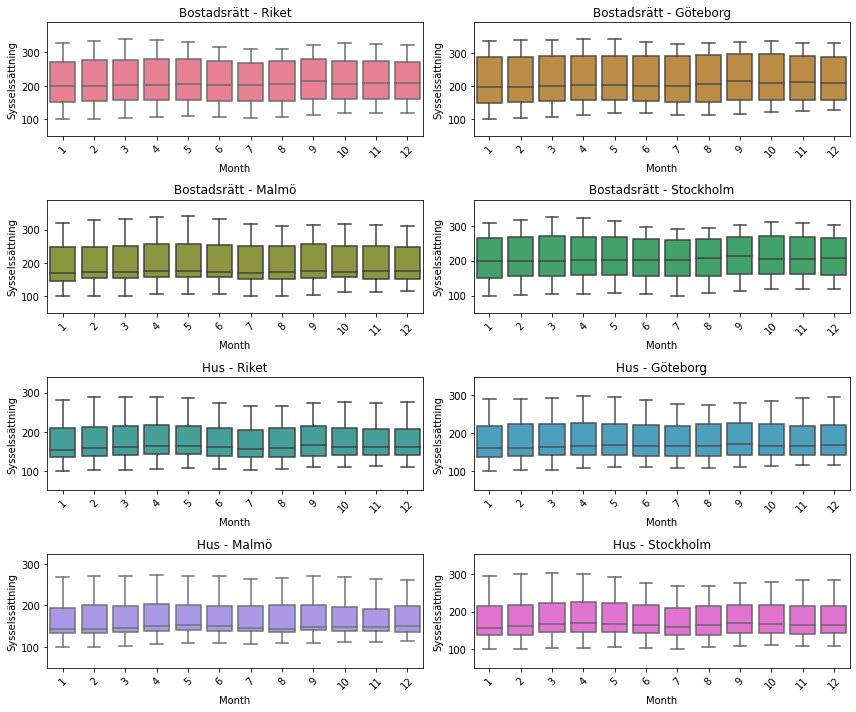

In [16]:

# Define a color palette with different colors for each boxplot
palette = sns.color_palette("husl", len(df.columns))

# Calculate the number of rows and columns needed for the subplots
num_cols = min(len(df.columns), 2)
num_rows = -(-len(df.columns) // num_cols)  # Ceiling division

# Set the figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Loop through each column and create a separate boxplot with different color
for i, (column, color) in enumerate(zip(df.columns, palette)):
    sns.boxplot(x=df.index.month, y=df[column], ax=axes[i], color=color)
    axes[i].set_title(column)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Sysselssättning')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add some space between boxplots
    axes[i].set(ylim=(df[column].min() - 50, df[column].max() + 50))

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

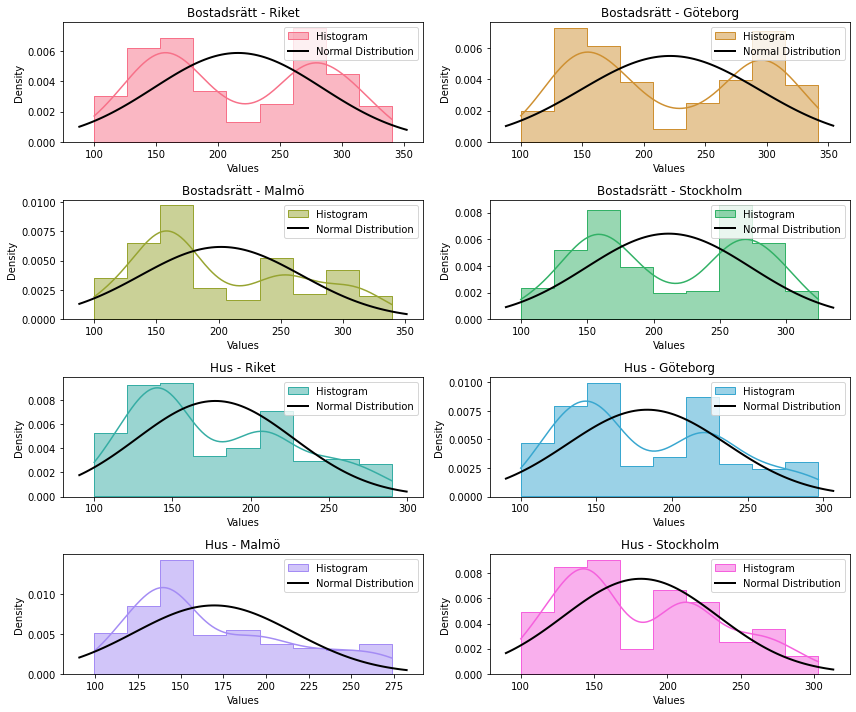

In [17]:

# Define a color palette with different colors for each histogram
palette = sns.color_palette("husl", len(df.columns))

# Calculate the number of rows and columns needed for the subplots
num_cols = min(len(df.columns), 2)
num_rows = -(-len(df.columns) // num_cols)  # Ceiling division

# Set the figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Loop through each column and create a separate histogram with normal distribution curve
for i, (column, color) in enumerate(zip(df.columns, palette)):
    # Plot histogram
    sns.histplot(df[column], kde=True, ax=axes[i], color=color, label='Histogram', element="step", stat="density")
    
    # Plot normal distribution curve
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = df[column].mean(), df[column].std()
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, label='Normal Distribution')
    
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [18]:
file_path = 'housingPrices.xlsx'

# Reset the index before saving to Excel
df.reset_index(inplace=True)

# Save the DataFrame to an Excel file
df.to_excel(file_path, index=False)

In [19]:
df

,Date,Bostadsrätt - Riket,Bostadsrätt - Göteborg,Bostadsrätt - Malmö,Bostadsrätt - Stockholm,Hus - Riket,Hus - Göteborg,Hus - Malmö,Hus - Stockholm
0,2005-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2005-02-01,101.006920,102.350448,101.543377,100.526120,101.036280,103.773210,99.434545,100.450413
2,2005-03-01,103.844188,105.650537,102.423704,103.797711,103.267158,104.559336,103.135556,102.562814
3,2005-04-01,106.029971,111.686422,106.505095,105.488554,104.909698,107.691027,106.765295,103.677527
4,2005-05-01,107.979960,117.638382,107.998984,106.494037,106.485137,110.004640,109.350586,104.024344
...,...,...,...,...,...,...,...,...,...
220,2023-05-01,310.559750,314.458029,310.098188,300.877240,255.411669,259.182554,244.516712,270.889998
221,2023-06-01,304.817439,310.241464,305.263280,294.893637,251.594774,257.420933,245.739267,262.530217
222,2023-07-01,299.953146,303.317077,303.312409,289.802287,246.582675,251.405838,249.276054,252.949197
223,2023-08-01,301.944431,305.923781,298.811667,293.158951,242.384535,247.804438,252.643034,246.348723


In [20]:
# Create a MultiIndex for columns
multi_index = pd.MultiIndex.from_product([['Bostadsrätt', 'Hus'], ['Riket', 'Göteborg', 'Malmö', 'Stockholm']],
                                        names=['Type', 'Region'])

# If the DataFrame has a 'Date' column, set it as the index
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)

# Ensure that the MultiIndex has the correct number of levels
assert multi_index.nlevels == 2, "MultiIndex should have 2 levels"

# Set the MultiIndex for columns
df.columns = multi_index

In [21]:
df

Type       Bostadsrätt                                             Hus  \
Region           Riket    Göteborg       Malmö   Stockholm       Riket   
Date                                                                     
2005-01-01  100.000000  100.000000  100.000000  100.000000  100.000000   
2005-02-01  101.006920  102.350448  101.543377  100.526120  101.036280   
2005-03-01  103.844188  105.650537  102.423704  103.797711  103.267158   
2005-04-01  106.029971  111.686422  106.505095  105.488554  104.909698   
2005-05-01  107.979960  117.638382  107.998984  106.494037  106.485137   
...                ...         ...         ...         ...         ...   
2023-05-01  310.559750  314.458029  310.098188  300.877240  255.411669   
2023-06-01  304.817439  310.241464  305.263280  294.893637  251.594774   
2023-07-01  299.953146  303.317077  303.312409  289.802287  246.582675   
2023-08-01  301.944431  305.923781  298.811667  293.158951  242.384535   
2023-09-01  307.381430  309.318985  303.898263  299.166753  244.344183   

Type                                            
Region        Göteborg       Malmö   Stockholm  
Date                                            
2005-01-01  100.000000  100.000000  100.000000  
2005-02-01  103.773210   99.434545  100.450413  
2005-03-01  104.559336  103.135556  102.562814  
2005-04-01  107.691027  106.765295  103.677527  
2005-05-01  110.004640  109.350586  104.024344  
...                ...         ...         ...  
2023-05-01  259.182554  244.516712  270.889998  
2023-06-01  257.420933  245.739267  262.530217  
2023-07-01  251.405838  249.276054  252.949197  
2023-08-01  247.804438  252.643034  246.348723  
2023-09-01  246.285347  250.731792  251.517038  

[225 rows x 8 columns]

In [22]:
df.columns.nlevels

2

In [23]:

# Extend Index
start_date = pd.to_datetime('2000-01-01')
end_date = pd.to_datetime('2023-09-01')
extended_index = pd.date_range(start=start_date, end=end_date, freq='MS')

# Reindex the DataFrame with the extended index
df = df.reindex(extended_index)

# Calculate Standard Deviation
std_dev = df.std()

Type         Region   
Bostadsrätt  Riket        68.148173
             Göteborg     72.581457
             Malmö        64.790237
             Stockholm    62.140899
Hus          Riket        50.170239
             Göteborg     52.529019
             Malmö        46.665290
             Stockholm    52.699161
dtype: float64

In [25]:
df.ffill()

Type       Bostadsrätt                                             Hus  \
Region           Riket    Göteborg       Malmö   Stockholm       Riket   
2000-01-01         NaN         NaN         NaN         NaN         NaN   
2000-02-01         NaN         NaN         NaN         NaN         NaN   
2000-03-01         NaN         NaN         NaN         NaN         NaN   
2000-04-01         NaN         NaN         NaN         NaN         NaN   
2000-05-01         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-05-01  310.559750  314.458029  310.098188  300.877240  255.411669   
2023-06-01  304.817439  310.241464  305.263280  294.893637  251.594774   
2023-07-01  299.953146  303.317077  303.312409  289.802287  246.582675   
2023-08-01  301.944431  305.923781  298.811667  293.158951  242.384535   
2023-09-01  307.381430  309.318985  303.898263  299.166753  244.344183   

Type                                            
Region        Göteborg       Malmö   Stockholm  
2000-01-01         NaN         NaN         NaN  
2000-02-01         NaN         NaN         NaN  
2000-03-01         NaN         NaN         NaN  
2000-04-01         NaN         NaN         NaN  
2000-05-01         NaN         NaN         NaN  
...                ...         ...         ...  
2023-05-01  259.182554  244.516712  270.889998  
2023-06-01  257.420933  245.739267  262.530217  
2023-07-01  251.405838  249.276054  252.949197  
2023-08-01  247.804438  252.643034  246.348723  
2023-09-01  246.285347  250.731792  251.517038  

[285 rows x 8 columns]

In [26]:
# Step 2: Backfill Data
df = df.ffill()

In [27]:
# Step 3-4: Backcast Data using Linear Regression
# Create a DataFrame with features (Date) and target (each column)
df_train = df.dropna()  # Drop rows with missing values
X_train = pd.to_numeric(df_train.index).values.reshape(-1, 1)

In [28]:
# Iterate over each column and perform backcasting
for col in df.columns:
    y_train = df_train[col].values.reshape(-1, 1)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the missing values (backcast)
    df_missing = df[df[col].isnull()]
    X_missing = pd.to_numeric(df_missing.index).values.reshape(-1, 1)
    y_backcast = model.predict(X_missing)

    # Fill backcasted values into the original DataFrame
    df.loc[df[col].isnull(), col] = y_backcast.flatten()

# Print the final DataFrame
df

Type       Bostadsrätt                                             Hus  \
Region           Riket    Göteborg       Malmö   Stockholm       Riket   
2000-01-01   40.307751   35.140300   37.512869   52.031909   49.582361   
2000-02-01   41.348900   36.242944   38.487525   52.975791   50.338941   
2000-03-01   42.322878   37.274450   39.399300   53.858778   51.046710   
2000-04-01   43.364026   38.377094   40.373956   54.802660   51.803291   
2000-05-01   44.371590   39.444169   41.317172   55.716095   52.535466   
...                ...         ...         ...         ...         ...   
2023-05-01  310.559750  314.458029  310.098188  300.877240  255.411669   
2023-06-01  304.817439  310.241464  305.263280  294.893637  251.594774   
2023-07-01  299.953146  303.317077  303.312409  289.802287  246.582675   
2023-08-01  301.944431  305.923781  298.811667  293.158951  242.384535   
2023-09-01  307.381430  309.318985  303.898263  299.166753  244.344183   

Type                                            
Region        Göteborg       Malmö   Stockholm  
2000-01-01   49.542495   53.794903   48.049633  
2000-02-01   50.335975   54.481643   48.841896  
2000-03-01   51.078262   55.124078   49.583046  
2000-04-01   51.871741   55.810818   50.375309  
2000-05-01   52.639624   56.475405   51.142015  
...                ...         ...         ...  
2023-05-01  259.182554  244.516712  270.889998  
2023-06-01  257.420933  245.739267  262.530217  
2023-07-01  251.405838  249.276054  252.949197  
2023-08-01  247.804438  252.643034  246.348723  
2023-09-01  246.285347  250.731792  251.517038  

[285 rows x 8 columns]

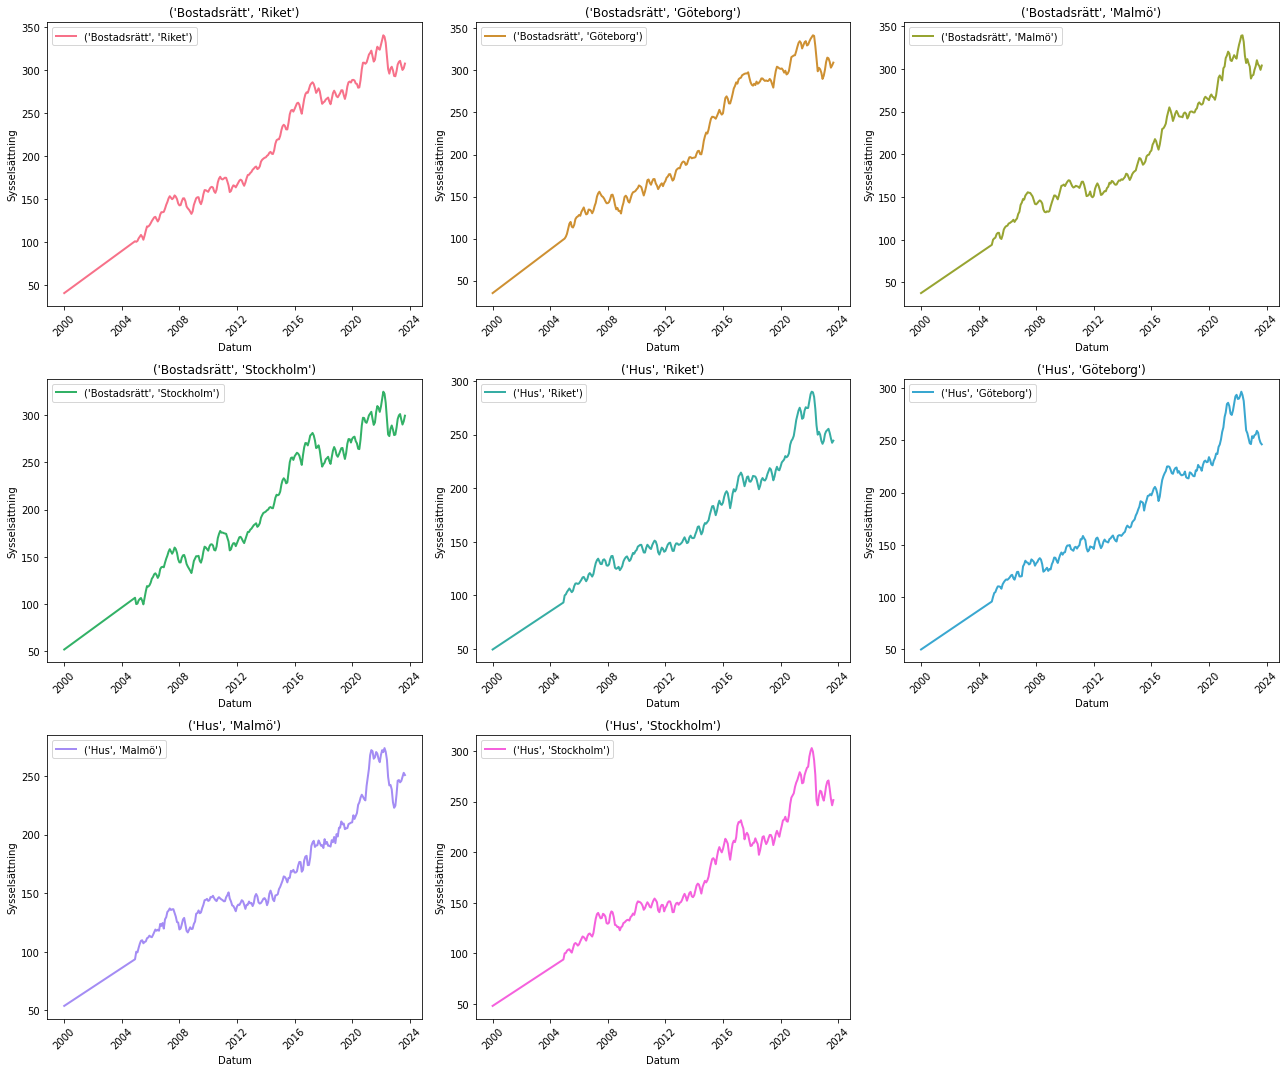

In [29]:
plot_data_with_trendline(df)

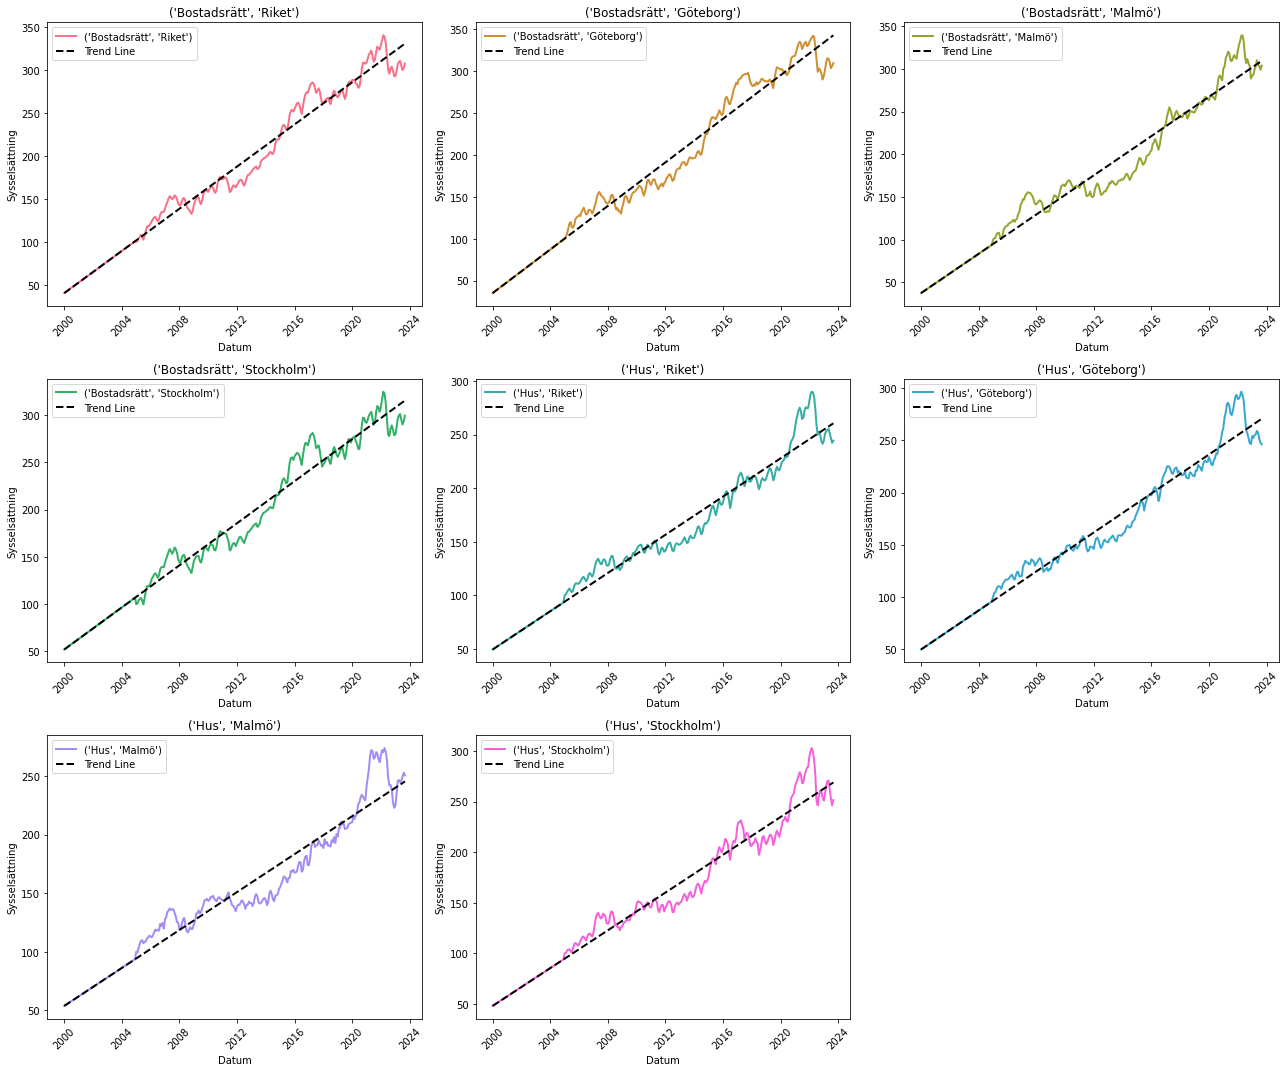

In [30]:
plot_data_with_trendline(df, include_trendline=True)

In [31]:
# Assuming df is your DataFrame

start_date_check = pd.to_datetime('2004-01-01')
end_date_check = pd.to_datetime('2006-01-01')

# Filter the DataFrame for the specified date range
data_check = df.loc[(df.index >= start_date_check) & (df.index <= end_date_check)]

# Print the filtered data
data_check


Type       Bostadsrätt                                             Hus  \
Region           Riket    Göteborg       Malmö   Stockholm       Riket   
2004-01-01   89.376089   87.106861   83.447475   96.516171   85.239276   
2004-02-01   90.417238   88.209505   84.422131   97.460053   85.995856   
2004-03-01   91.391216   89.241011   85.333906   98.343040   86.703625   
2004-04-01   92.432365   90.343655   86.308562   99.286922   87.460206   
2004-05-01   93.439928   91.410731   87.251778  100.200357   88.192381   
2004-06-01   94.481077   92.513375   88.226434  101.144239   88.948962   
2004-07-01   95.488640   93.580450   89.169650  102.057674   89.681136   
2004-08-01   96.529789   94.683094   90.144306  103.001556   90.437717   
2004-09-01   97.570938   95.785739   91.118963  103.945438   91.194298   
2004-10-01   98.578502   96.852814   92.062178  104.858873   91.926473   
2004-11-01   99.619651   97.955458   93.036835  105.802755   92.683053   
2004-12-01  100.627214   99.022533   93.980050  106.716190   93.415228   
2005-01-01  100.000000  100.000000  100.000000  100.000000  100.000000   
2005-02-01  101.006920  102.350448  101.543377  100.526120  101.036280   
2005-03-01  103.844188  105.650537  102.423704  103.797711  103.267158   
2005-04-01  106.029971  111.686422  106.505095  105.488554  104.909698   
2005-05-01  107.979960  117.638382  107.998984  106.494037  106.485137   
2005-06-01  105.850619  119.837966  108.056719  103.602022  104.784862   
2005-07-01  102.401092  114.141245  102.165444   99.739928  103.035946   
2005-08-01  107.197938  113.120598  100.857260  106.616828  104.440872   
2005-09-01  112.958881  116.379689  105.363543  113.575440  108.718643   
2005-10-01  117.926906  123.116691  111.915161  119.071612  111.097330   
2005-11-01  117.713667  125.441097  114.513745  118.538098  111.283675   
2005-12-01  119.115030  126.311287  115.910980  119.774375  110.710359   
2006-01-01  121.447912  128.049428  116.419640  122.507747  111.256996   

Type                                            
Region        Göteborg       Malmö   Stockholm  
2004-01-01   86.938409   86.160293   85.388226  
2004-02-01   87.731889   86.847033   86.180489  
2004-03-01   88.474176   87.489467   86.921638  
2004-04-01   89.267655   88.176207   87.713901  
2004-05-01   90.035539   88.840794   88.480608  
2004-06-01   90.829018   89.527534   89.272871  
2004-07-01   91.596901   90.192121   90.039577  
2004-08-01   92.390380   90.878861   90.831840  
2004-09-01   93.183860   91.565601   91.624103  
2004-10-01   93.951743   92.230188   92.390809  
2004-11-01   94.745222   92.916928   93.183072  
2004-12-01   95.513106   93.581515   93.949779  
2005-01-01  100.000000  100.000000  100.000000  
2005-02-01  103.773210   99.434545  100.450413  
2005-03-01  104.559336  103.135556  102.562814  
2005-04-01  107.691027  106.765295  103.677527  
2005-05-01  110.004640  109.350586  104.024344  
2005-06-01  110.056888  109.801462  102.109053  
2005-07-01  109.616399  107.202389  100.715243  
2005-08-01  107.798978  108.299399  105.025988  
2005-09-01  112.000731  108.820440  109.099563  
2005-10-01  114.021292  111.512716  110.212450  
2005-11-01  115.658841  112.147584  109.250639  
2005-12-01  116.719547  113.726453  107.626733  
2006-01-01  116.393486  112.812982  108.891686

In [33]:
df.to_excel('boprisindex.xlsx', index=True)
